# O melhor lugar para um novo poço.

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
* [Etapa 2. Transformações dos dados](#tranforamation_data)
* [Etapa 3. Modelo](#model)
* [Conclusões](#end)

Você trabalha na empresa de mineração OilyGiant. Sua tarefa é encontrar os melhores lugares para o desenvolvimento de novos poços de petróleo.

Para concluir essa tarefa, você vai precisar executar as seguintes etapas:

- Ler os arquivos com parâmetros coletados de poços de petróleo na região selecionada: a quantidade de petróleo e o volume de reservas;
- Construir um modelo para predizer o volume de reservas em novos poços;
- Escolher os poços de petróleo que têm os maiores valores estimados;
- Escolher a região com o maior lucro total para os poços de petróleo selecionados.
- Você tem dados sobre amostras de petróleo de três regiões. Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.


### Objetivo: 
- Como você preparou os dados para o treinamento (ou seja, você escalou as características?)
- Você seguiu todas as etapas das instruções?
- Você levou em consideração todas as condições comerciais?
- Quais são suas conclusões sobre o estudo da tarefa?
- Você aplicou a técnica de Bootstrapping corretamente?
- Você sugeriu a melhor região para o desenvolvimento de poços? Justificou sua escolha?
- Você evitou a duplicação de código? Ou seja, você conseguiu usar funções para treinar modelos e fazer predições nos arquivos 'geo_data_1.csv' e 'geo_data_2.csv' ?
- Você manteve a estrutura do projeto e manteve o código limpo?




### Descrição de dados

- `Abra e examine o arquivo de dados. Caminho para o arquivo:`
geo_data_0.csv, geo_data_1.csv, geo_data_2.csv. Baixar o conjunto de dados

[Voltar ao Índice](#back)

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Carregue os dados das consultas, explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np                   # Para operações numéricas
import pandas as pd                  # Para manipulação de dados
import matplotlib.pyplot as plt       # Para visualização de dados
import seaborn as sns                # Para visualizações estatísticas
from scipy import stats as st        # Para estatísticas e testes
from scipy.stats import bootstrap     # Para o método de bootstrap
from sklearn.utils import resample    # Para reamostragem de dados
from sklearn.metrics import accuracy_score  # Para cálculo de acurácia
from sklearn.metrics import mean_squared_error  # Para cálculo do erro quadrático médio

# Comentários sobre cada biblioteca:
# - pandas: Utilizada para manipulação e análise de dados, especialmente com DataFrames.
# - numpy: Biblioteca fundamental para computação científica com suporte a arrays e funções matemáticas.
# - matplotlib.pyplot: Usada para criar gráficos e visualizações de dados.
# - seaborn: Extensão do matplotlib que oferece uma interface mais amigável para visualizações estatísticas.
# - scipy: Biblioteca que fornece funções e algoritmos para matemática, ciência e engenharia.
# - sklearn: Biblioteca para aprendizado de máquina que fornece ferramentas para modelagem e avaliação de modelos.


## Carregue os Dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df_geo_0 = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 9/geo_data_0.csv')
df_geo_1 = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 9/geo_data_1.csv')
df_geo_2 = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 9/geo_data_2.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [3]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
# vamos exibir as primeiras 10 linhas
df_geo_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [7]:
# vamos exibir as primeiras 10 linhas
df_geo_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [8]:
# vamos exibir as primeiras 10 linhas
df_geo_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


## Explore os dados iniciais

**Descrição dos dados**

- `id` - (identificador unívoco de poço de petróleo)
- `f0, f1, f2` - (três características de pontos (seu significado específico não é importante, mas as próprias características são significativas))
- `product` - (volume de reservas no poço de petróleo (milhares de barris)).



### Duplicatas <a id='duplicates'></a>
Encontrando de duplicatas óbvias na tabela:

In [12]:
# Verificar Valores Duplicados
df_geo_0.duplicated().sum()

0

In [13]:
# Verificar Valores Duplicados
df_geo_1.duplicated().sum()

0

In [14]:
# Verificar Valores Duplicados
df_geo_2.duplicated().sum()

0

### Valores ausentes <a id='missing_values'></a>

In [9]:
# Verificar Valores Ausentes
df_geo_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
# Verificar Valores Ausentes
df_geo_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
# Verificar Valores Ausentes
df_geo_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

### Conclusões intermediárias <a id='data_preprocessing_conclusions_intermediary'></a>

Podemos observar que não há dados faltantes ou duplicados.Está tudo coerente ao pré-procesamento de dados.


[Voltar ao Índice](#back)

## Etapa 3. Modelo <a id='model'></a>

In [15]:
data_all = [df_geo_0, df_geo_1, df_geo_2 ]

In [16]:
# Importação de bibliotecas para modelagem e avaliação de modelos
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.linear_model import LinearRegression      # Para criar um modelo de regressão linear
from sklearn.metrics import mean_absolute_error        # Para calcular o erro absoluto médio

# Comentários sobre cada importação:
# - train_test_split: Utilizado para dividir um conjunto de dados em subconjuntos de treino e teste, facilitando a validação do modelo.
# - LinearRegression: Classe que implementa a regressão linear, um dos métodos mais simples e utilizados em aprendizado de máquina.
# - mean_absolute_error: Função que calcula a média dos erros absolutos entre as previsões e os valores reais, útil para avaliar a performance do modelo.


In [42]:
# Criando listas para salvar os targets e as predições
samples_target = []       # Lista para armazenar os valores reais (targets)
samples_predictions = []  # Lista para armazenar as predições do modelo

# Loop através de cada região nos dados
for region in range(len(data_all)):
    data = data_all[region]  # Seleciona os dados da região atual
    features = data.drop(['product', 'id'], axis=1)  # Remove colunas indesejadas para as features
    target = data['product']  # Define a coluna 'product' como target
    
    # Divide os dados em conjuntos de treino e validação
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=123456)
    
    # Cria e treina o modelo de regressão linear
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Faz previsões com o conjunto de validação
    predictions = model.predict(features_valid)
    
    # Armazena os valores reais e as predições nas listas
    samples_target.append(target_valid.reset_index(drop=True))  # Reseta o índice para alinhar as séries
    samples_predictions.append(pd.Series(predictions))  # Converte as predições em uma série do pandas


In [20]:
mean_product = target.mean()

In [21]:
mean_product

95.00000000000004

Criamos um modelo de Regressão Linear para avaliar a volatividade dos valores de reservas de poços. 

### Imprimindo o volume médio predito de reservas e o REQM do modelo.

In [43]:
# Inicializando listas para armazenar a média e o RMSE (Root Mean Squared Error)
mean = []  # Lista para armazenar as médias dos targets
rmse = []  # Lista para armazenar os valores de RMSE

# Loop através das primeiras três regiões
for region in range(0, 3):
    # Calcula a média dos valores reais (targets) para a região atual e adiciona à lista
    mean.append(samples_target[region].mean())
    
    # Calcula o RMSE entre os valores reais e as predições, e adiciona à lista
    rmse.append(mean_squared_error(samples_target[region], samples_predictions[region], squared=False))

# Comentários sobre o código:
# - O loop percorre as primeiras três regiões para calcular a média dos targets e o RMSE das predições.
# - O RMSE é uma métrica que indica a precisão das predições; quanto menor, melhor o desempenho do modelo.


In [23]:
mean

[93.1898161393134, 69.02747842574298, 94.9781301255784]

In [24]:
rmse

[37.80046993478272, 0.8904933206270058, 39.98039278339241]

Podemos ver as médias de cada ponto do poços e o RMSE. Quanto maior o erro quadrático médio, maior o afastamento entre o retorno do fundo e o retorno do benchmark. Quanto menor o erro quadrático médio, menor o afastamento entre o retorno do fundo e o retorno do benchmark.

### Analise dos resultados.

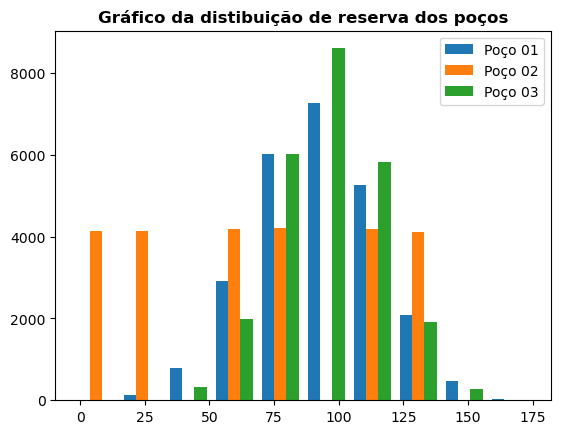

In [25]:
plt.hist(samples_predictions, 
         label = ['Poço 01','Poço 02','Poço 03']);
plt.legend(prop ={'size': 10})
plt.title('Gráfico da distibuição de reserva dos poços',
          fontweight ="bold")
  
plt.show()

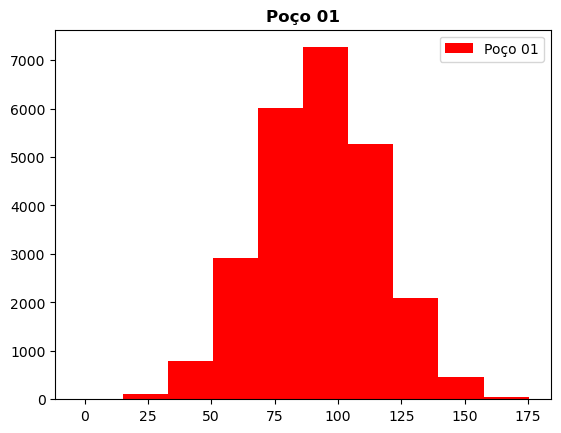

In [26]:
plt.hist(samples_predictions[0], 
         label = 'Poço 01', color ='red' );
plt.legend(prop ={'size': 10})
plt.title('Poço 01',
          fontweight ="bold")
  
plt.show()

In [27]:
samples_predictions[0].describe()

count    25000.000000
mean        92.492866
std         23.299327
min         -2.707394
25%         76.559516
50%         92.578063
75%        108.462626
max        175.267816
dtype: float64

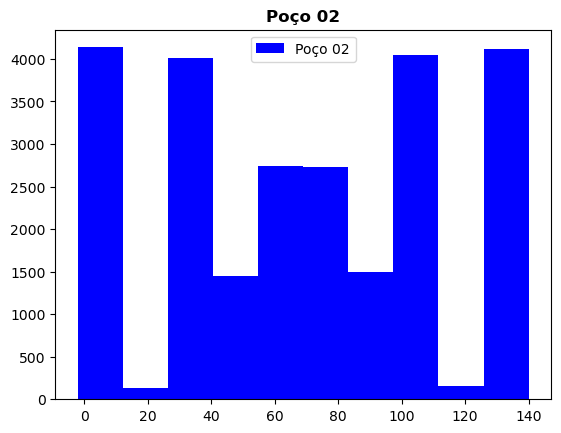

In [28]:
plt.hist(samples_predictions[1], 
         label = 'Poço 02', color = 'blue');
plt.legend(prop ={'size': 10})
plt.title('Poço 02',
          fontweight ="bold")
  
plt.show()

In [29]:
samples_predictions[1].describe()

count    25000.000000
mean        69.030554
std         45.914712
min         -2.062835
25%         28.588983
50%         79.811759
75%        109.348517
max        139.982924
dtype: float64

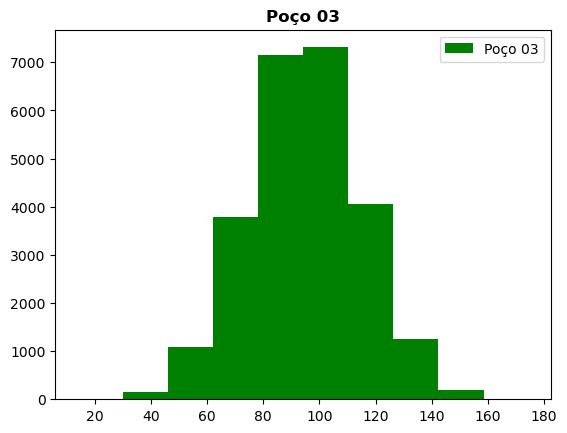

In [30]:
plt.hist(samples_predictions[2], 
         label = 'Poço 03', color = 'green');
plt.legend(prop ={'size': 10})
plt.title('Poço 03',
          fontweight ="bold")
  
plt.show()

In [31]:
samples_predictions[2].describe()

count    25000.000000
mean        94.848357
std         19.893166
min         13.798107
25%         81.356632
50%         94.798383
75%        108.328394
max        174.636585
dtype: float64

Vemos que os valores preditos dos poços 01,03 são bem volateis enquanto o do poço 02 tem mais instabilidade.

## Calculando o Lucro


In [32]:
# Apenas regressão linear pode ser usada para o treinamento do modelo (o resto não são previsíveis o suficiente).
# Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
# O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
# Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
# Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.

### Armazeno todos os valores necessários para os cálculos em variáveis separadas.

### Calculo o volume de reservas suficiente para desenvolver um novo poço sem prejuízos. Comparo o valor recebido com o valor médio de reservas em cada região.

In [33]:
# Definindo o orçamento total disponível
budget = 1000000  # Orçamento em unidades monetárias

# Definindo o custo por poço
pit = 5000  # Custo de desenvolvimento de um poço

# Calculando o número máximo de poços que podem ser desenvolvidos dentro do orçamento
cost_pit_budget = budget // pit  # Número de poços que podem ser construídos

# Definindo o preço de venda por unidade de reserva
price = 45  # Preço por unidade de reserva

# Calculando o custo por poço com base no orçamento e no número de poços
cost_pit = budget / cost_pit_budget  # Custo médio por poço

# Calculando o volume de reservas necessário para não ter prejuízo
zero_loss = cost_pit / price  # Volume de reservas necessário para cobrir o custo do poço

# Resultado: volume de reservas necessário para evitar prejuízos
zero_loss

In [36]:
# Função para calcular o lucro com base nos targets e predições
def profit(target, predictions):
    # Ordena as predições em ordem decrescente
    predictions_sorted = predictions.sort_values(ascending=False)
    
    # Seleciona os pontos correspondentes aos targets dos poços que podem ser desenvolvidos
    selected_points = target[predictions_sorted.index][:cost_pit_budget]
    
    # Calcula a soma das reservas dos poços selecionados
    product = selected_points.sum()
    
    # Calcula a receita total a partir do produto (reservas) e do preço por unidade
    revenue = product * price
    
    # O custo total é igual ao orçamento disponível
    cost = budget
    
    # Retorna o lucro, que é a receita menos o custo
    return revenue - cost


In [37]:
profit(samples_target[0],samples_predictions[0])

349118.69017630955

In [38]:
profit(samples_target[1],samples_predictions[1])

241508.66966815107

In [39]:
profit(samples_target[2],samples_predictions[2])

240506.16903170897

O volume de reservas para desenvolver um novo poço sem que haja prejuizo é de R$111.11 aproximadamente.

Podemos ver os lucros para cada região sendo a região 01 se destacando, as demais com menores lucros, em destaque para a região (indice 2) apresenta menor lucro.

## Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:

Escolho os poços com os valores mais altos de predições, sumarizo o volume alvo de reservas de acordo com essas predições e apresento minhas conclusões: sugiro uma região para o desenvolvimento de poços de petróleo e justifico minha escolha, calculando o lucro para o volume de reservas recebido.



## Calcule riscos e lucro para cada região:

Utilizo a técnica de bootstrapping com 1000 amostras para encontrar a distribuição de lucros, encontro o lucro médio, o intervalo de confiança de 95% e o risco de prejuízo. Considero prejuízo como um lucro negativo, calculo-o como uma probabilidade e depois o expresso como uma porcentagem, utilizando um tamanho de amostra de 500.

In [40]:
# Definindo o tamanho da amostra para o bootstrapping
sample_size = 500  # Número de observações em cada amostra

# Definindo o número total de amostras a serem geradas
bootstrap = 1000  # Total de amostras a serem criadas para a análise

# Inicializando um gerador de números aleatórios com uma semente fixa
state = np.random.RandomState(123456)  # Garante a reprodutibilidade dos resultados


In [41]:
# Loop através das três regiões disponíveis
for region in range(3):
    # Seleciona os alvos e predições correspondentes para a região atual
    target_0 = samples_target[region]  # Alvos de reservas para a região
    predictions_0 = samples_predictions[region]  # Predições de lucro para a região
    values = []  # Lista para armazenar os lucros calculados

    # Realiza o bootstrapping para calcular os lucros
    for i in range(bootstrap):
        # Cria uma amostra com reposição a partir dos alvos da região
        target_subsample = target_0.sample(n=sample_size, replace=True, random_state=state)
        # Obtém as predições correspondentes à amostra selecionada
        probs_subsample = predictions_0[target_subsample.index]

        # Calcula o lucro para a amostra e adiciona à lista de valores
        values.append(profit(target_subsample, probs_subsample))

    # Converte a lista de lucros em uma série do pandas para análise
    values = pd.Series(values)
    # Calcula o limite inferior do lucro (percentil 1%)
    lower = values.quantile(0.01)
    # Calcula o intervalo de confiança de 95% para os lucros
    confidenial_interval = (values.quantile(0.025), values.quantile(0.975))
    # Calcula a probabilidade de obter lucro negativo
    negative_profit_chance = (values < 0).mean()
    # Calcula o lucro médio das amostras
    mean_profit = values.mean()

    # Exibe os resultados para a região atual
    print("Região", region)
    print("Média da amostra =", mean_profit)
    print("95% intervalo confidencial", confidenial_interval)
    print("Risco de Perdas =", negative_profit_chance * 100, "%")
    print()


Região 0
Média da amostra = 51498.242641315504
95% intervalo confidencial (1121.5333057253174, 105479.06779972691)
Risco de Perdas =  2.5 %

Região 1
Média da amostra = 50701.41992626898
95% intervalo confidencial (7862.926920003483, 93221.46844675804)
Risco de Perdas =  0.7000000000000001 %

Região 2
Média da amostra = 38670.938179043194
95% intervalo confidencial (-13637.598691764946, 90268.8671799549)
Risco de Perdas =  6.7 %



Podemos que ver que a Região 1(Poço 02) é o poço onde poço onde os riscos são menores.

## Conclusão geral <a id='end'></a>

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, e sklearn para criação do nosso modelo.

Verificamos se realmente o pre-processamento foi feito, para que não tivesse acontecido algum problema na criação do nosso modelo.

E desenvolvemos um modelo para recomedação, e usamos Regressão Linear para descobrir o melhor lugar para um novo poço, calculamos a receita de cada região, usamos a técnica de bootstrap para recolher amostras aleátorias.E concluimos que a Região 1(Poço 02) é a melhor escolha para construir um novo poço com base no menor risco para a receita.